In [1]:
import torch
import numpy as np

In [2]:


x = torch.rand(3)

print(x)

torch.cuda.is_available()

x = torch.empty(1)
print(x)
x = torch.empty(3, 3)
print(x)

x = torch.rand(2, 2)
print(x)

x = torch.ones(2, 2, dtype=torch.int)
print(x)

print(x.dtype)

x = torch.tensor([3, 2, 4, 3])
print(x)

y = torch.rand(4, 1)

z = x + y

print(y)
print(z)

z = torch.add(x, y)
print(z)

y = torch.rand(x.shape)
y.add_(x)
print(y)

z = torch.sub(x, y)
print(z)

z = torch.mul(x, y)
print(z)

z = torch.div(x, y)
print(z)

x = torch.rand(5, 3)
print(x[:, :2])

print(x[0, 0].item())

y = x.view(3, 5)
print(y)
z = x.view(15)
print(z)



tensor([0.4504, 0.4566, 0.2301])
tensor([0.])
tensor([[-3.0273e+04,  3.0788e-41,  1.4256e-11],
        [ 4.5755e-41,  1.4013e-45,  0.0000e+00],
        [ 4.4842e-44,  0.0000e+00, -3.0388e+04]])
tensor([[0.4464, 0.2369],
        [0.4254, 0.8555]])
tensor([[1, 1],
        [1, 1]], dtype=torch.int32)
torch.int32
tensor([3, 2, 4, 3])
tensor([[0.0095],
        [0.2251],
        [0.7811],
        [0.0972]])
tensor([[3.0095, 2.0095, 4.0095, 3.0095],
        [3.2251, 2.2251, 4.2251, 3.2251],
        [3.7811, 2.7811, 4.7811, 3.7811],
        [3.0972, 2.0972, 4.0972, 3.0972]])
tensor([[3.0095, 2.0095, 4.0095, 3.0095],
        [3.2251, 2.2251, 4.2251, 3.2251],
        [3.7811, 2.7811, 4.7811, 3.7811],
        [3.0972, 2.0972, 4.0972, 3.0972]])
tensor([3.6934, 2.7673, 4.3220, 3.4786])
tensor([-0.6934, -0.7673, -0.3220, -0.4786])
tensor([11.0803,  5.5347, 17.2879, 10.4357])
tensor([0.8123, 0.7227, 0.9255, 0.8624])
tensor([[0.8843, 0.2418],
        [0.5349, 0.6995],
        [0.0281, 0.8223],
       

In [3]:

a = torch.ones(4)

b = a.numpy()

print(b)

a.add_(1)
print(a)
print(b)

print(a.device)

a = np.ones(4)
b = torch.from_numpy(a)
c = torch.Tensor(a)
a += 1
print(b, c)

print(torch.cuda.is_available())
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(4, device = device)
    print(x)
    print(x.device)
    y = torch.ones(4)
    y = y.to(device)
    z = x + y
#     z.numpy() #error
    z_cpu = z.to('cpu')
    print(z_cpu)

x = torch.ones(5, requires_grad=True)

print(x)



[1. 1. 1. 1.]
tensor([2., 2., 2., 2.])
[2. 2. 2. 2.]
cpu
tensor([2., 2., 2., 2.], dtype=torch.float64) tensor([1., 1., 1., 1.])
True
tensor([1., 1., 1., 1.], device='cuda:0')
cuda:0
tensor([2., 2., 2., 2.])
tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [4]:

x = torch.randn(3, requires_grad=True)
print(x)

y = x + 2
print(y)

z = y * y * 2
z = z.mean()
print(z)

z.backward() # dz/dx
print(x.grad)

z = y * y * 2
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v)
print(x.grad)


with torch.no_grad():
    y = x + 2
    print(y)

x.requires_grad_(False)
y = x + 2
print(y)
# x.detach()


weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_()

# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad()


tensor([ 0.6080, -0.1171,  1.3756], requires_grad=True)
tensor([2.6080, 1.8829, 3.3756], grad_fn=<AddBackward0>)
tensor(14.4947, grad_fn=<MeanBackward0>)
tensor([3.4774, 2.5105, 4.5008])
tensor([ 4.5206, 10.0421,  4.5144])
tensor([2.6080, 1.8829, 3.3756])
tensor([2.6080, 1.8829, 3.3756])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [5]:
## Backpropagation

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

y_hat = w * x

loss = (y_hat - y)**2

print(loss)

# backward pass

loss.backward()
print(w.grad)



tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [6]:
# gradients using numpy

# f = w * x = 2 * x
X = np.array([1, 2, 3, 4]).astype(np.float32)

Y = np.array([2, 4, 6, 8]).astype(np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
#d3/dw = 1/N 2x(w*x - y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward
    y_pred = forward(X)
    
    #loss
    l = loss(Y, y_pred)
    
    #gradients
    dw = gradient(X,Y,y_pred)
    
    #update weights
    w -= learning_rate * dw
    
    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200000, loss = 30.00000000
epoch 3: w = 1.872000, loss = 0.76800019
epoch 5: w = 1.979520, loss = 0.01966083
epoch 7: w = 1.996723, loss = 0.00050331
epoch 9: w = 1.999476, loss = 0.00001288
epoch 11: w = 1.999916, loss = 0.00000033
epoch 13: w = 1.999987, loss = 0.00000001
epoch 15: w = 1.999998, loss = 0.00000000
epoch 17: w = 2.000000, loss = 0.00000000
epoch 19: w = 2.000000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [7]:
# gradients using torch

# f = w * x = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)

Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward
    y_pred = forward(X)
    
    #loss
    l = loss(Y, y_pred)
    
    #gradients
    l.backward() # dl/dw
    
    
    #update weights
    with torch.no_grad():
        w -= learning_rcte * w.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000


NameError: name 'learning_rcte' is not defined

In [8]:

# 1) design model (input, output size, forward pass)
# 2) construct loss and optimizer
# 3) Training loops
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights

import torch
import torch.nn as nn


X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)

Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# # model prediction
# def forward(x):
#     return w * x

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

# # loss = MSE
# def loss(y, y_predicted):
#     return ((y_predicted - y)**2).mean()
loss = nn.MSELoss()
# optimizer = torch.optim.SGD([w], lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_test = torch.tensor([5], dtype=torch.float32)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward
#     y_pred = forward(X)
    y_pred = model(X)
    
    #loss
    l = loss(Y, y_pred)
    
    #gradients
    l.backward() # dl/dw
    
    
#     #update weights
#     with torch.no_grad():
#         w -= learning_rcte * w.grad
    
#     # zero gradients
#     w.grad.zero_()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():3f}, loss = {l:.8f}')
#         print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


4 1
Prediction before training: f(5) = -2.710
epoch 1: w = -0.004448, loss = 52.22869873
epoch 11: w = 1.651543, loss = 1.35265708
epoch 21: w = 1.918677, loss = 0.03629294
epoch 31: w = 1.962391, loss = 0.00215996
epoch 41: w = 1.970147, loss = 0.00120578
epoch 51: w = 1.972098, loss = 0.00111416
epoch 61: w = 1.973094, loss = 0.00104876
epoch 71: w = 1.973917, loss = 0.00098770
epoch 81: w = 1.974692, loss = 0.00093021
epoch 91: w = 1.975440, loss = 0.00087607
Prediction after training: f(5) = 9.951


epoch 100, loss = 561.0742
epoch 200, loss = 342.4601
epoch 300, loss = 333.0042
epoch 400, loss = 332.5870
epoch 500, loss = 332.5684
epoch 600, loss = 332.5676
epoch 700, loss = 332.5675
epoch 800, loss = 332.5676
epoch 900, loss = 332.5676
epoch 1000, loss = 332.5676


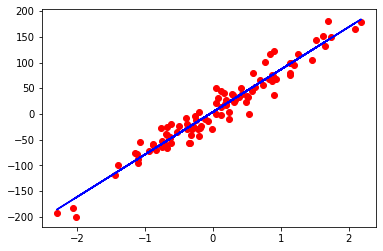

In [16]:

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 1000
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 100 == 0:
        print(f'epoch {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


In [19]:
# logistic regression

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 0) prepare data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


# 1) model

# f = wx + b, sigmoid at the end


class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

input_size = n_features
output_size = 1

model = LogisticRegression(input_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 1000
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    #backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 100 == 0:
        print(f'epoch {epoch+1}, loss = {loss.item():.4f}')

# eval
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')
    
# plot
# predicted = model(X_test).detach()
# plt.plot(X_test, y, 'ro')
# plt.plot(X_numpy, predicted, 'b')
# plt.show()


epoch 100, loss = 0.2488
epoch 200, loss = 0.1771
epoch 300, loss = 0.1456
epoch 400, loss = 0.1274
epoch 500, loss = 0.1154
epoch 600, loss = 0.1067
epoch 700, loss = 0.1001
epoch 800, loss = 0.0949
epoch 900, loss = 0.0906
epoch 1000, loss = 0.0870
accuracy = 0.9561


In [1]:

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset):
    
    def __init__(self, transform=None):
        xy = np.loadtxt('./data/ignore/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1 shape
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])


# dataset = WineDataset(transform=ToTensor())
# dataset = WineDataset(transform=composed)
dataset = WineDataset(transform=None)
# first_data = dataset[0]
# features, labels = first_data
# print(features, labels)
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = iter(dataloader)

# data = dataiter.next()
# features, labels = data
# print(features, labels)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
# print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward, backward, update
        if (i+1)%5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step{i+1}/{n_iterations}, inputs {inputs.shape}')

# torchvision.datasets.MNIST()
# fashion-mnist, cifar, coco


epoch 1/2, step5/45, inputs torch.Size([4, 13])
epoch 1/2, step10/45, inputs torch.Size([4, 13])
epoch 1/2, step15/45, inputs torch.Size([4, 13])
epoch 1/2, step20/45, inputs torch.Size([4, 13])
epoch 1/2, step25/45, inputs torch.Size([4, 13])
epoch 1/2, step30/45, inputs torch.Size([4, 13])
epoch 1/2, step35/45, inputs torch.Size([4, 13])
epoch 1/2, step40/45, inputs torch.Size([4, 13])
epoch 1/2, step45/45, inputs torch.Size([2, 13])
epoch 2/2, step5/45, inputs torch.Size([4, 13])
epoch 2/2, step10/45, inputs torch.Size([4, 13])
epoch 2/2, step15/45, inputs torch.Size([4, 13])
epoch 2/2, step20/45, inputs torch.Size([4, 13])
epoch 2/2, step25/45, inputs torch.Size([4, 13])
epoch 2/2, step30/45, inputs torch.Size([4, 13])
epoch 2/2, step35/45, inputs torch.Size([4, 13])
epoch 2/2, step40/45, inputs torch.Size([4, 13])
epoch 2/2, step45/45, inputs torch.Size([2, 13])


In [2]:

import torch
import torchvision

dataset = torchvision.datasets.MNIST(
    root='./data/ignore/', transform=torchvision.transforms.ToTensor()
)


RuntimeError: Dataset not found. You can use download=True to download it

In [11]:

import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1, 0.1])

outputs = softmax(x)
print(outputs)

x = torch.tensor([2, 1, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)


def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # /  float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])

# y_pred has probabilites
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')


# torch
loss = nn.CrossEntropyLoss()

Y = torch.tensor([2, 0, 1])
# nsamples x nclasses = 1x3
Y_pred_good = torch.tensor([[.1, 1.0, 2.1], [2.1, 1.0, 2.], [.1, 3.0, 1.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3], [0.5, 2.0, 0.3], [2.5, 1.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)



[0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
0.45854488015174866
1.8897881507873535
tensor([2, 0, 1])
tensor([1, 1, 0])


In [15]:
# NeuralNet2

import torch
import torch.nn as nn

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()


# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # signmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()



In [20]:
## Activation functions

import torch
import torch.nn as nn
import torch.nn.functional as F

# option1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
#         nn.Sigmoid
#         nn.Softmax
#         nn.TanH
#         nn.LeakyReLU
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
    
# option1 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out



In [19]:
# feedforward.py
# MNIST
# DataLoader, Transformation
# Multilayer Neural Net, activation fucntion
# Loss and Optimizer
# Training Loop (batch training)
# Model evaluation
# GPU support

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data/ignore/', train=True,
                                          transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data/ignore/', train=False,
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)

samples, labels = examples.next()
print(samples.shape, labels.shape)

# for i in range(6):
#     plt.subplot(2, 3, i+1)
#     plt.imshow(samples[i][0], cmap='gray')
# plt.show()

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100 x 784
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
        
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1 / 2, step 100/600, loss = 0.4406
epoch 1 / 2, step 200/600, loss = 0.2648
epoch 1 / 2, step 300/600, loss = 0.3180
epoch 1 / 2, step 400/600, loss = 0.3850
epoch 1 / 2, step 500/600, loss = 0.2314
epoch 1 / 2, step 600/600, loss = 0.2968
epoch 2 / 2, step 100/600, loss = 0.3493
epoch 2 / 2, step 200/600, loss = 0.2228
epoch 2 / 2, step 300/600, loss = 0.1951
epoch 2 / 2, step 400/600, loss = 0.1592
epoch 2 / 2, step 500/600, loss = 0.1521
epoch 2 / 2, step 600/600, loss = 0.0749
accuracy = 95.29


In [4]:
# Convolutional neural networks using pytorch
# cnn.py

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]
# we transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

# CIFAR10
train_dataset = torchvision.datasets.CIFAR10(root='./data/ignore/', train=True,
                                          transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data/ignore/', train=False,
                                          transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# implement conv net
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape = [4, 3, 32, 32] = 4, 3, 1024
        # input_layer = 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
    
print('Finished Training')

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(len(classes))]
    n_class_samples = [0 for i in range(len(classes))]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predictions == labels).sum().item()
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy of network = {acc} %')
    
    for i in range(len(classes)):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Files already downloaded and verified
epoch 1 / 4, step 2000/12500, loss = 2.2815
epoch 1 / 4, step 4000/12500, loss = 2.2737
epoch 1 / 4, step 6000/12500, loss = 2.2999
epoch 1 / 4, step 8000/12500, loss = 2.2941
epoch 1 / 4, step 10000/12500, loss = 2.2146
epoch 1 / 4, step 12000/12500, loss = 1.9389
epoch 2 / 4, step 2000/12500, loss = 2.2308
epoch 2 / 4, step 4000/12500, loss = 1.6168
epoch 2 / 4, step 6000/12500, loss = 1.4803
epoch 2 / 4, step 8000/12500, loss = 1.5485
epoch 2 / 4, step 10000/12500, loss = 2.2059
epoch 2 / 4, step 12000/12500, loss = 1.7959
epoch 3 / 4, step 2000/12500, loss = 1.2699
epoch 3 / 4, step 4000/12500, loss = 1.3085
epoch 3 / 4, step 6000/12500, loss = 1.9914
epoch 3 / 4, step 8000/12500, loss = 1.3287
epoch 3 / 4, step 10000/12500, loss = 1.5374
epoch 3 / 4, step 12000/12500, loss = 2.6831
epoch 4 / 4, step 2000/12500, loss = 1.5150
epoch 4 / 4, step 4000/12500, loss = 1.7602
epoch 4 / 4, step 6000/12500, loss = 1.4767
epoch 4 / 4, step 8000/12500, lo

In [ ]:
# Transfer learning

